Import Libraries

In [2]:
import pandas as pd         
import numpy as np         
import matplotlib.pyplot as plt         
import seaborn as  sns          

Load data into dataframe

In [3]:
df = pd.read_csv('Healthcare.csv') 

Viewing data content

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [6]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [7]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [8]:
print(df['Gender'].unique()) # Checking no. of gender types
print(df['Blood Type'].unique()) # Checking no. of blood types
print(df['Insurance Provider'].unique()) # Checking no. of insurance providers


['Male' 'Female']
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']


Cleaning Data

In [9]:
df.isnull().sum() # Checking for null values

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [10]:
duplicate_rows_df = df[df.duplicated()] # Checking duplicated rows
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (534, 15)


In [11]:
df = df.drop_duplicates() # Dropping duplicated rows

 Visualise: Most infrastructure for highest frequency of patients and admission type (Medical Conditions VS Patient Number) + (Medical Conditions VS Admission Type)

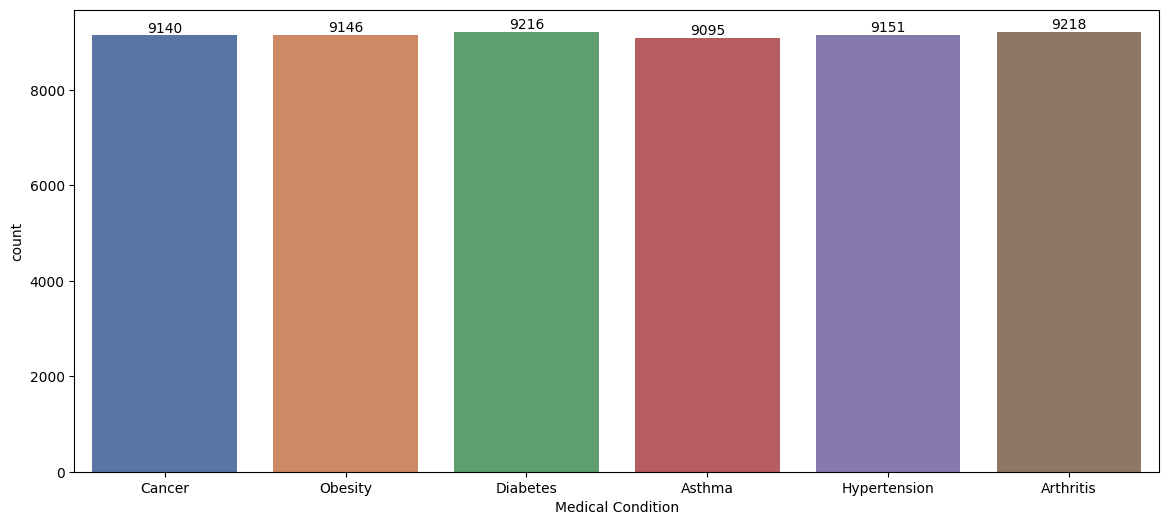

In [30]:
# Which Medical Condition is the most common ?
Common_Medical = sns.countplot(x = 'Medical Condition',legend = False, hue='Medical Condition', data = df, palette = 'deep')

plt.rcParams['figure.figsize'] = (14, 6)
for bars in Common_Medical.containers:
    Common_Medical.bar_label(bars)

In [13]:
df['Medical Condition'].value_counts() # Count of Unique Medical Condition

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

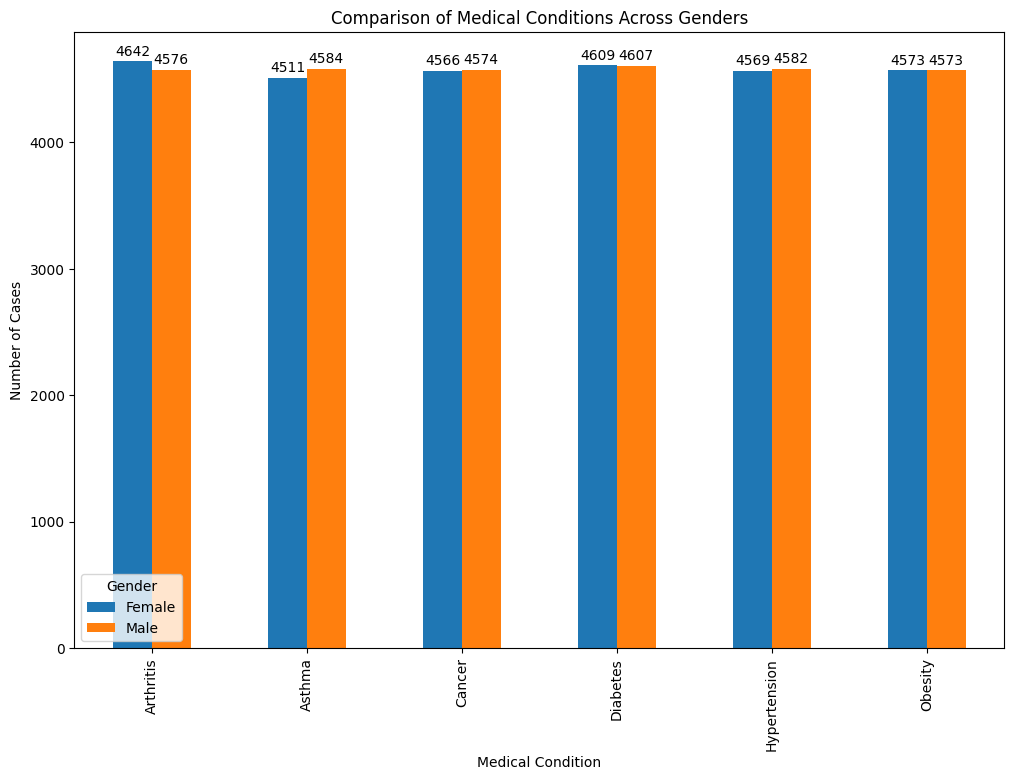

In [19]:
## Comparison of individual Medical Conditions Across Genders

# Gruping Gender and Medical Condition
unique_medical = df.groupby(['Gender', 'Medical Condition']).size().unstack()

# Plotting graph of Gender VS Medical Condition
graph_Gender_Medical = unique_medical.T.plot(kind='bar', figsize=(12, 8), title='Comparison of Medical Conditions Across Genders')

# Add labels
plt.xlabel('Medical Condition')
plt.ylabel('Number of Cases')
plt.legend(title='Gender')
for bars in graph_Gender_Medical.containers:    # Labelling Numbers above graph
    graph_Gender_Medical.bar_label(bars, padding = 2)

# Show the chart
plt.show()

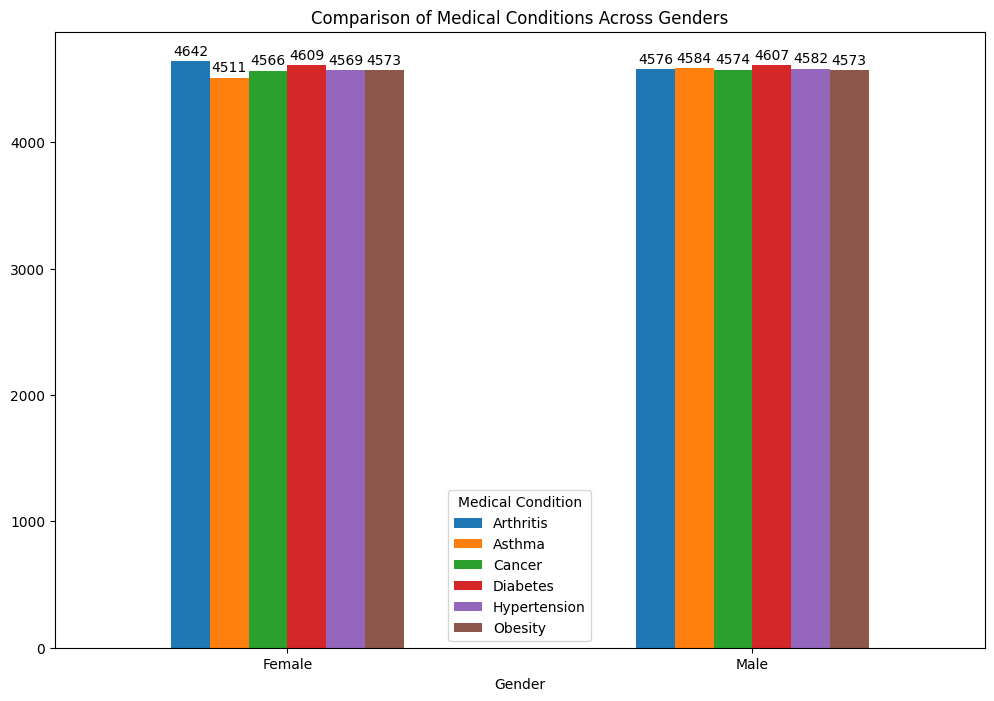

In [ ]:
## Comparison of most common medical condition for each gender

compare = unique_medical.plot(kind='bar', figsize=(12, 8), title='Comparison of Medical Conditions Across Genders')
plt.xticks(rotation=0)  # Adjust words on x axis
for bars in compare.containers:    # Labelling Numbers above graph
    compare.bar_label(bars, padding = 2)

# Highest Medical condition in Female is Arthritis
# Highest Medical condition in Male is 